In [1]:
import csv
import pandas

In [2]:
data = pandas.read_csv('number_of_travelers.csv')

data.columns

Index(['month', 'passengers'], dtype='object')

In [3]:
data

,month,passengers
0,2000-01-01,46492
1,2000-02-01,48526
2,2000-03-01,58764
3,2000-04-01,56033
4,2000-05-01,58201
...,...,...
235,2019-08-01,83784
236,2019-09-01,72590
237,2019-10-01,78617
238,2019-11-01,73074


<AxesSubplot:xlabel='month'>

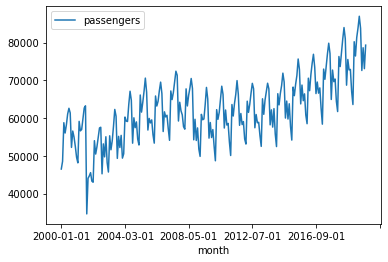

In [4]:
data.plot(x='month', y='passengers')

<AxesSubplot:xlabel='month'>

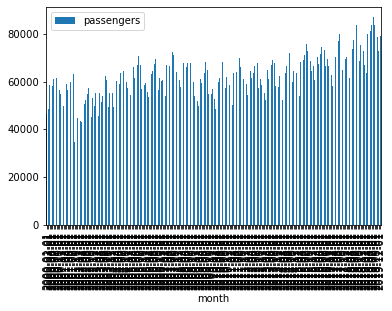

In [5]:
#graphique en barres afin de mieux visualiser lors du tri en trimestres
data.plot.bar(x='month', y='passengers')

In [6]:
# trier par trimestre:
data_trimestre = data[1:3].sum();
data_trimestre

month         2000-02-012000-03-01
passengers                  107290
dtype: object

In [7]:
#création de la colonne quarters
data['month'] = pandas.to_datetime(data['month'], format='%Y/%m/%d')
data['quarter'] = data['month'].dt.quarter
data

,month,passengers,quarter
0,2000-01-01,46492,1
1,2000-02-01,48526,1
2,2000-03-01,58764,1
3,2000-04-01,56033,2
4,2000-05-01,58201,2
...,...,...,...
235,2019-08-01,83784,3
236,2019-09-01,72590,3
237,2019-10-01,78617,4
238,2019-11-01,73074,4


In [8]:
#Création de la colonne sum
data_group = pandas.DataFrame(data)
df = data_group.groupby(['quarter']).sum()
df

,passengers
quarter,
1,3459680
2,3894748
3,3929089
4,3659656


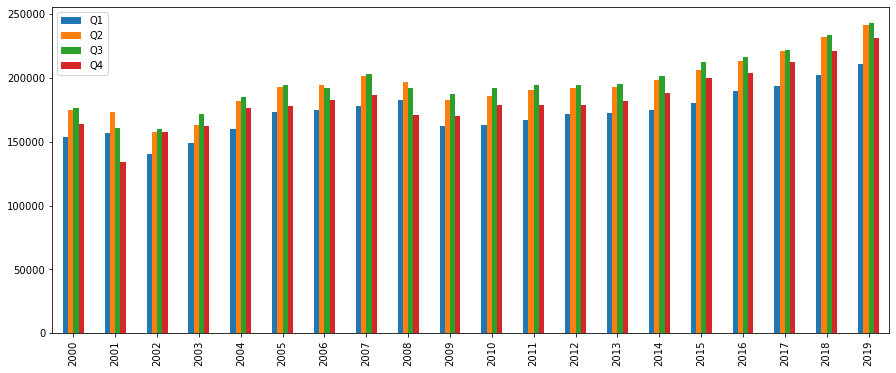

In [9]:
# Correction du prof en utilisant la bibliothèque seaborn:
import pandas as pd
import datetime as dt
import seaborn
import matplotlib.pyplot as plt
from seaborn.categorical import barplot

# Lecture du fichier CVS
number_of_travelers_df = pd.read_csv('number_of_travelers.csv')
#Conversion de la colonne "month" en dates lisibles par python
number_of_travelers_df['month'] = pd.to_datetime(number_of_travelers_df['month'], format='%Y-%m-%d')
# Création d'une nouvelle colonne pour les trimestres
number_of_travelers_df['trimester'] = number_of_travelers_df['month'].dt.quarter
# Création d'une colonne pour les années
number_of_travelers_df['year'] = number_of_travelers_df['month'].dt.year
#
travelers = number_of_travelers_df[['passengers','year','trimester']].groupby(by=['year','trimester']).sum().values
travelers_by_trimester = pd.DataFrame(travelers.reshape(20, 4), index = list(range(2000, 2020)), columns=['Q1', 'Q2', 'Q3', 'Q4'])

# Tracage du graph
fig, ax = plt.subplots(figsize=(15, 6))
travelers_by_trimester.plot(kind = 'bar', ax=ax)
plt.show()